# Lab 1: Exploratory Data Analysis (EDA)

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
df = pd.read_csv('./bank.csv')

### 1. Formulate a particular question that might be interesting to answer by exploring this dataset

### 2. Calculate statistics for the numerical and categorical attributes.

#### 2.1 Calculate statistics for the numerical attributes.

In [23]:
df.head(5)

age          job   marital  education default  balance housing loan  \
0  32.0   technician    single   tertiary      no      392     yes   no   
1  39.0   technician  divorced  secondary      no      688     yes  yes   
2  59.0      retired   married  secondary      no     1035     yes  yes   
3  47.0  blue-collar   married  secondary      no      398     yes  yes   
4  54.0      retired   married  secondary      no     1004     yes   no   

    contact  day month  duration  campaign  pdays  previous poutcome  \
0  cellular    1   apr       957         2    131         2  failure   
1  cellular    1   apr       233         2    133         1  failure   
2  cellular    1   apr       126         2    239         1  failure   
3  cellular    1   apr       274         1    238         2  failure   
4  cellular    1   apr       479         1    307         1  failure   

  subscribed  
0         no  
1         no  
2         no  
3         no  
4         no

In [24]:
df.tail(5)

age           job  marital  education default  balance housing loan  \
1995  20.0       student   single        NaN      no     2785      no   no   
1996  28.0        admin.   single  secondary      no      127      no   no   
1997  81.0       retired  married    primary      no     1154      no   no   
1998  46.0      services  married    primary      no     4343     yes   no   
1999  40.0  entrepreneur  married  secondary      no     6403      no   no   

        contact  day month  duration  campaign  pdays  previous poutcome  \
1995   cellular   16   sep       327         2     -1         0      NaN   
1996   cellular   16   sep      1334         2     -1         0      NaN   
1997  telephone   17   sep       231         1     -1         0      NaN   
1998        NaN   20   sep       185         1     -1         0      NaN   
1999   cellular   22   sep       208         2     -1         0      NaN   

     subscribed  
1995        yes  
1996        yes  
1997        yes  
1998        yes  
1999        yes

In [65]:
df.describe()

age       balance          day     duration     campaign  \
count  1988.000000   2000.000000  2000.000000  2000.000000  2000.000000   
mean     41.753018   1413.663500    13.851500   292.020500     1.909500   
std      12.724358   3131.224213     9.712189   221.557295     1.378862   
min      18.000000   -980.000000     1.000000     7.000000     1.000000   
25%      32.000000    201.500000     5.000000   146.000000     1.000000   
50%      38.000000    551.000000    12.000000   236.000000     1.000000   
75%      50.000000   1644.500000    23.000000   379.000000     2.000000   
max      93.000000  81204.000000    31.000000  1823.000000    11.000000   

             pdays     previous  
count  2000.000000  2000.000000  
mean    167.896000     2.561500  
std     131.754126     3.400735  
min      -1.000000     0.000000  
25%      75.750000     1.000000  
50%     182.000000     2.000000  
75%     251.000000     3.000000  
max     854.000000    55.000000

From summary above there is definitely a skew in balance with previous also having a small skew. 

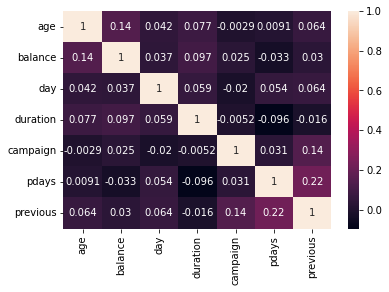

In [64]:
sns.heatmap(df.corr(), annot= True);

From the heatmap above, there is no real correlation between any of the attributes. Pair plots also show not correlation, but they do show an outlier in the balance. 

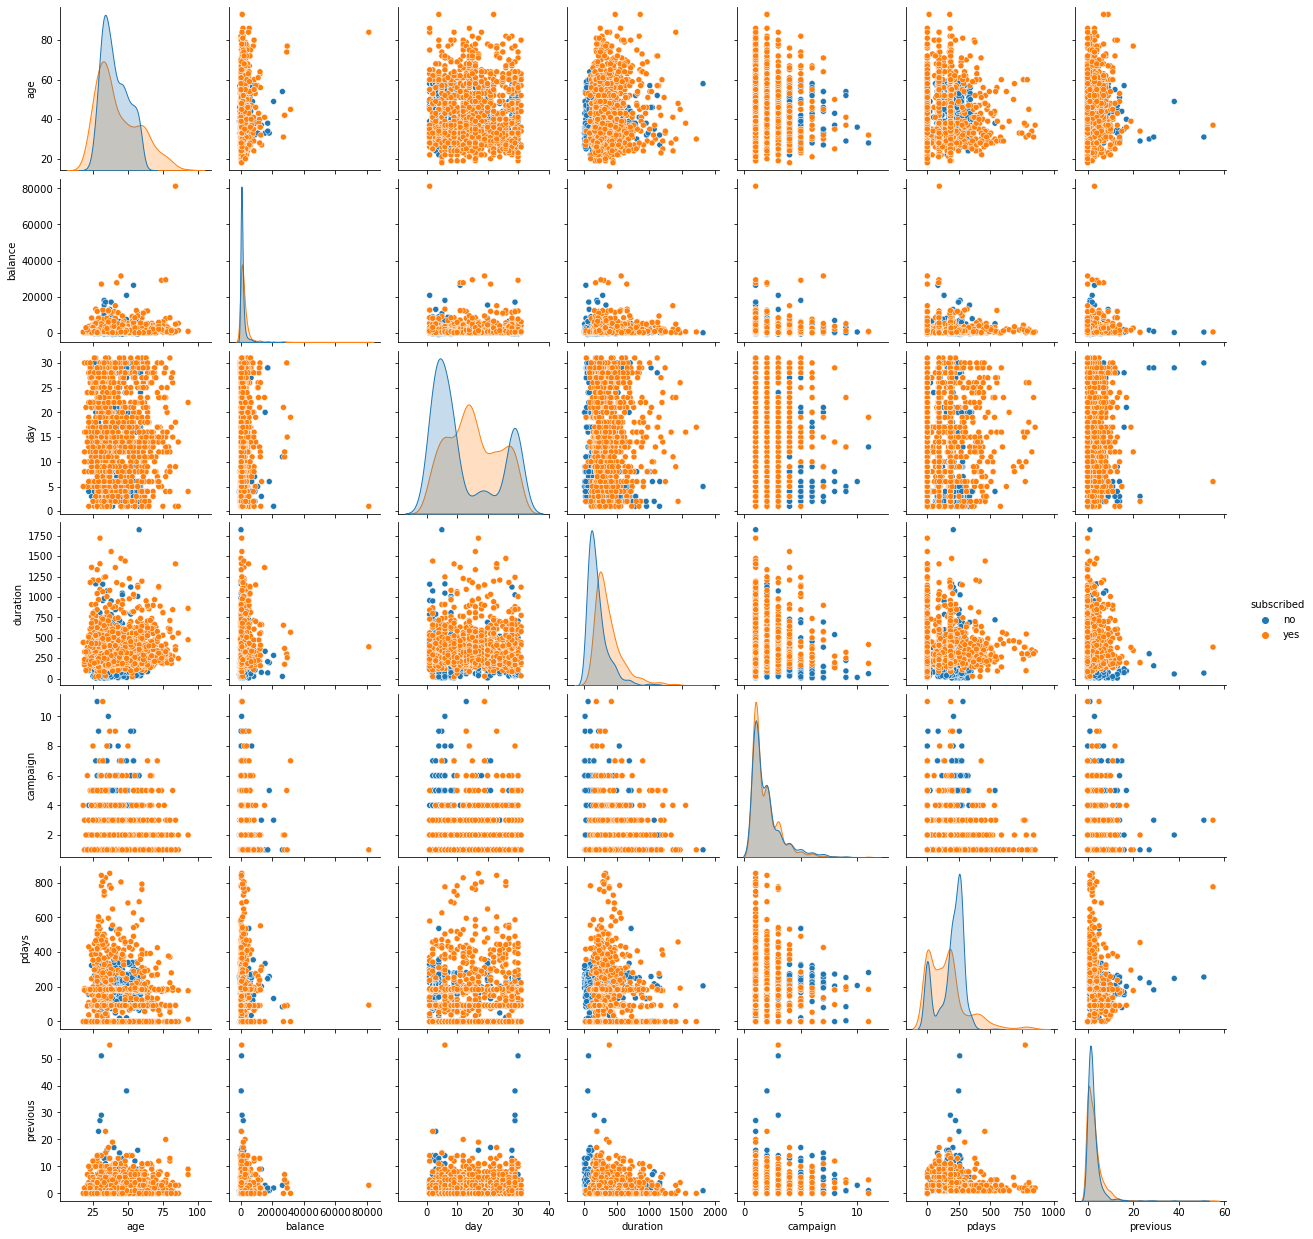

In [66]:
sns.pairplot(hue='subscribed', data=df)
plt.show()

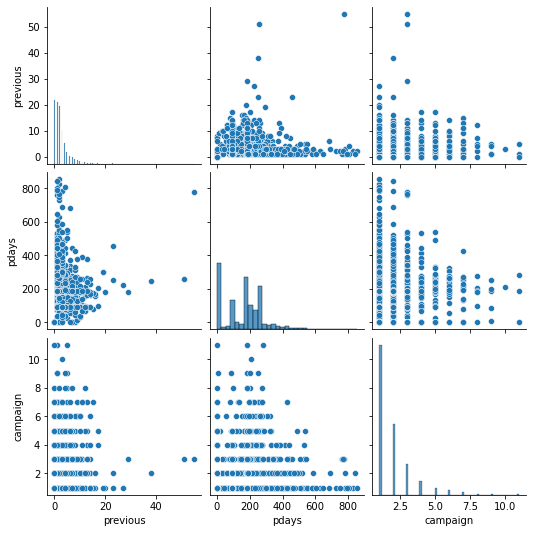

In [67]:
sns.pairplot(data=df[['previous','pdays','campaign']].dropna())
plt.show()

#### 2.2 Calculate statistics for the categorical attributes.

In [42]:
df['job'].value_counts()

management       461
technician       348
blue-collar      298
admin.           247
services         165
retired          162
student           96
unemployed        69
self-employed     64
entrepreneur      45
housemaid         35
Name: job, dtype: int64

In [43]:
df['education'].value_counts()

secondary    995
tertiary     684
primary      217
Name: education, dtype: int64

In [44]:
df['poutcome'].value_counts()

failure    955
success    444
other      147
Name: poutcome, dtype: int64

In [45]:
df['subscribed'].value_counts()

no     1000
yes    1000
Name: subscribed, dtype: int64

In [46]:
df['housing'].value_counts()

no     1037
yes     963
Name: housing, dtype: int64

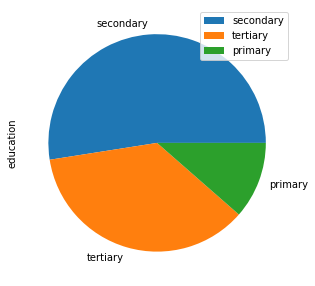

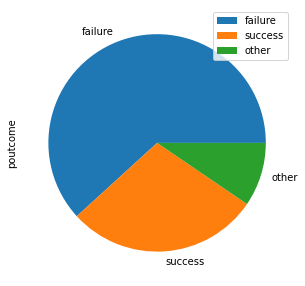

In [47]:
dfpt1 = pd.DataFrame({'education': [995, 684 , 217]},
                  index=['secondary', 'tertiary', 'primary'])
plot = dfpt1.plot.pie(y='education', figsize=(5, 5))

dfpt2 = pd.DataFrame({'poutcome': [955, 444 , 147]},
                  index=['failure', 'success', 'other'])
plot = dfpt2.plot.pie(y='poutcome', figsize=(5, 5))

#### 2.3 Draw a short conclusion

### 3. Use at least two different plotting techniques to plot the distribution of some numerical attributes.

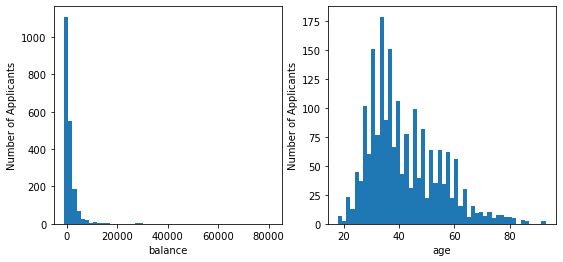

In [107]:
fig, axs =  plt.subplots(nrows=1, ncols=2, figsize = (9,4))

axs[0].hist(df['balance'], bins = 50)
axs[0].set_xlabel('balance')
axs[0].set_ylabel('Number of Applicants')

axs[1].hist(df['age'], bins = 50)
axs[1].set_xlabel('age')
axs[1].set_ylabel('Number of Applicants')
plt.show()

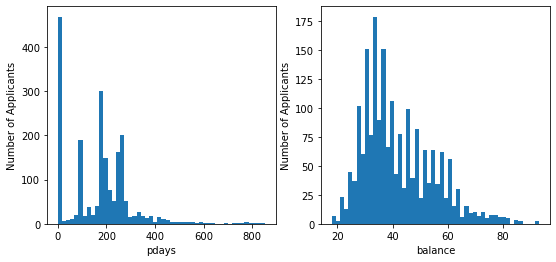

In [108]:
fig, axs =  plt.subplots(nrows=1, ncols=2, figsize = (9,4))

axs[0].hist(df['pdays'], bins = 50)
axs[0].set_xlabel('pdays')
axs[0].set_ylabel('Number of Applicants')

axs[1].hist(df['age'], bins = 50)
axs[1].set_xlabel('balance')
axs[1].set_ylabel('Number of Applicants')
plt.show()


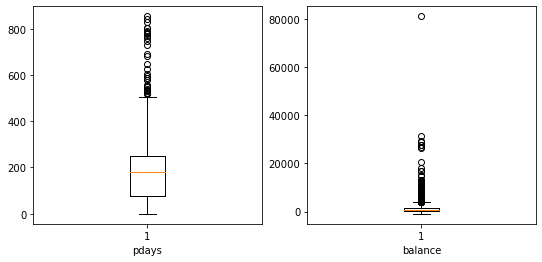

In [122]:
fig, axs =  plt.subplots(nrows=1, ncols=2, figsize = (9,4))

axs[0].boxplot(df['pdays'])  
axs[0].set_xlabel('pdays')

axs[1].boxplot(df['balance'])
axs[1].set_xlabel('balance')

plt.show()


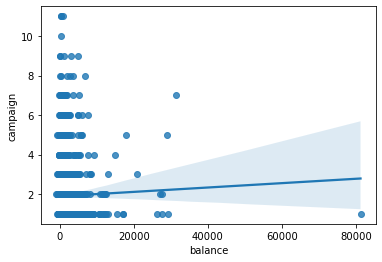

In [39]:
sns.regplot(data=df, x='balance', y='campaign')
plt.show()

<AxesSubplot:xlabel='age', ylabel='balance'>

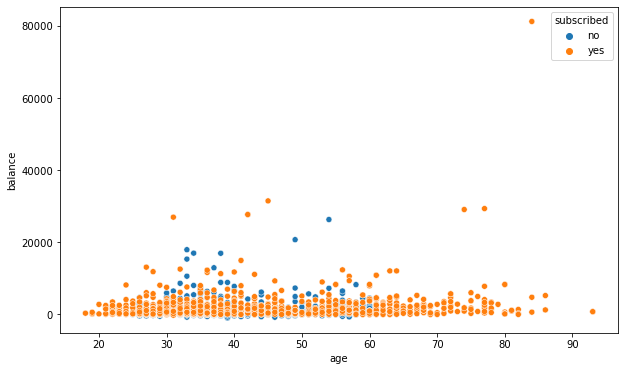

In [93]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='age', y='balance',hue='subscribed')

<AxesSubplot:xlabel='age', ylabel='pdays'>

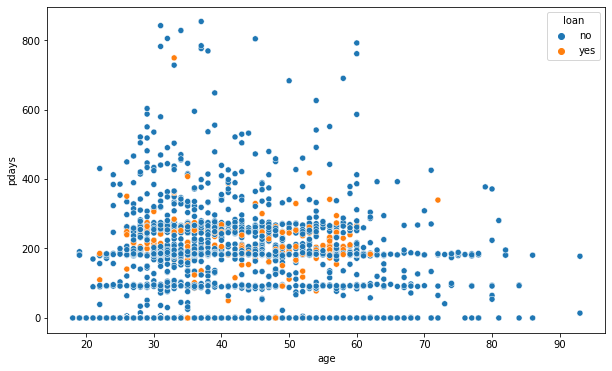

In [124]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='age', y='pdays',hue='loan')

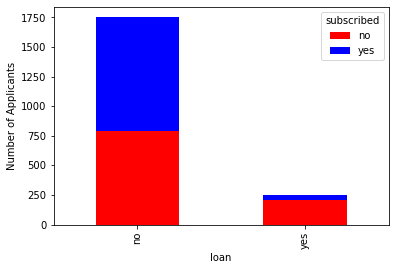

In [125]:
crosstab_CL = pd.crosstab(df['loan'], df['subscribed'])
crosstab_CL.plot(kind='bar', stacked=True, color=['red', 'blue'])
plt.ylabel('Number of Applicants')
plt.show()

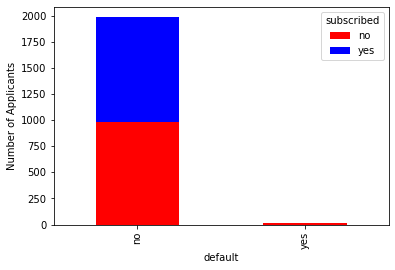

In [126]:
crosstab_CL = pd.crosstab(df['default'], df['subscribed'])
crosstab_CL.plot(kind='bar', stacked=True, color=['red', 'blue'])
plt.ylabel('Number of Applicants')
plt.show()

### 4. Generate two plots with the combined distribution of attributes and draw conclusions from them

<AxesSubplot:xlabel='balance', ylabel='loan'>

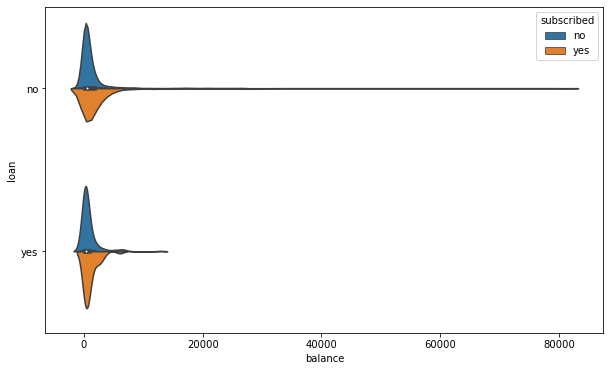

In [127]:
plt.figure(figsize=(10,6))
sns.violinplot(data=df, x='balance', y='loan', hue='subscribed', split=True)

<AxesSubplot:xlabel='balance', ylabel='housing'>

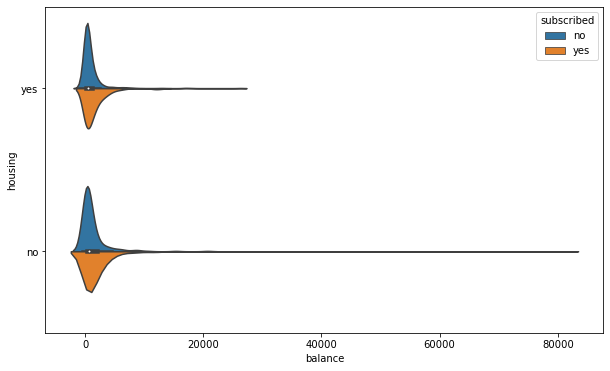

In [128]:
plt.figure(figsize=(10,6))
sns.violinplot(data=df, x='balance', y='housing', hue='subscribed', split=True)

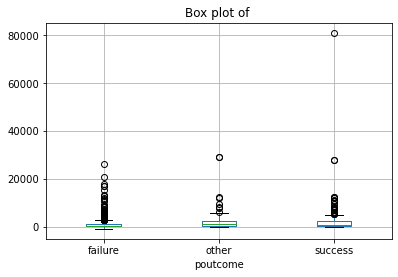

In [129]:
df.boxplot(column='balance', by='poutcome')
plt.title('Box plot of ')
plt.suptitle("") # get rid of the automatic 'Box plot grouped by group_by_column_name' title
plt.show()

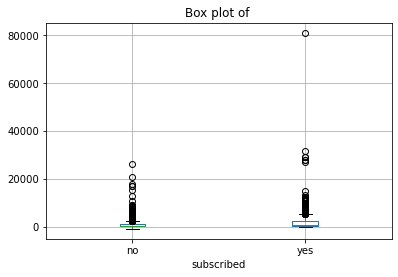

In [130]:
df.boxplot(column='balance', by='subscribed')
plt.title('Box plot of ')
plt.suptitle("") # get rid of the automatic 'Box plot grouped by group_by_column_name' title
plt.show()